<center><h1>Técnicas de Inteligencia Artificial</header1></center>

Presentado por: Wilmer José Solano Llano  <br>
Fecha: 18/07/2022

# Importación de librerias necesarias

In [2]:
#Para esta actividad se importarán las siguientes librerías:
import pandas as pd #Libreria para importar archivos
import numpy as np #Libreria para menejar los datos 

## Cargar el Dataset

In [3]:
#Código para cargar el Dataset
#Declarando variable para el dataset de Predicción de precios inmobiliarios 
datasetInmobilaria=pd.read_csv("Real estate.csv",sep=",") 
#Mostrar el dataset importado
datasetInmobilaria.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


## Descripción de la fuente del Dataset

Haga una descripción de la fuente de dayos utilizada (Incluya los enlaces necesarios).
El dataset con el que se va a trabajar contiene la información de 415 inmuebles. Contiene 7 características, la cual cuenta con 6 variables independiente y 1 variable dependiente.


**Variable dependiete**


Y house price of unit area: Precio de la casa del área unitaria.

**Variables independientes**

transaction date: fecha de compra

house age: La antigüedad de la casa

distance to the nearest MRT station: Distacia a la estación mas cercana

number of convenience stores: Número de tiendas de conveniencia

latitude: Latitud de la ubicación de la casa

longitude: Longitud de la ubicación de la casa

In [4]:
#desplegar la descripción del dataset
datasetInmobilaria.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


## Explique el problema a resolver.
Se desea crear un modelo el cual tendrá como objetivo predecir el precio de una inmobiliaria según sus características. La cual la característica de los datos ya se observó anteriormente. Cuenta como variable objetivo el precio que se identifica cómo "Y house price of unit area". Mientras que las variables de entrada son: transaction date, house age distance to the nearest MRT station, number of convenience stores, latitude, longitude.

## Caracterización del Dataset

Realice una descripción de los datos con:

>- Número de instancias en total.
>- Número de atributos de entrada, su significado y tipo.
>- Estadísticas de la variable objetivo.
>- Estadísticas los atributos en relación con la variable objetivo.


In [5]:
#Número de instancias en total.
datasetInmobilaria.count()

No                                        414
X1 transaction date                       414
X2 house age                              414
X3 distance to the nearest MRT station    414
X4 number of convenience stores           414
X5 latitude                               414
X6 longitude                              414
Y house price of unit area                414
dtype: int64

In [6]:
#Número de atributos de entrada, su significado y tipo.
#Eliminando de la info la característica dependiente
datasetInmobilaria.drop('Y house price of unit area', axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 22.8 KB


<AxesSubplot:>

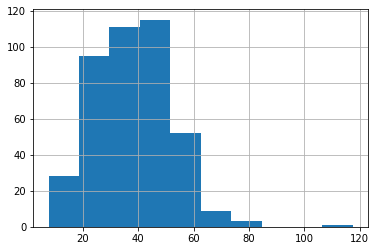

In [7]:
#Estadísticas de la variable objetivo
%matplotlib inline
#Crear gráfico de barras como la variable objetivo continua.
datasetInmobilaria['Y house price of unit area'].hist()

En un par de párrafos haga un resumen de los principales hallazagos encontrados:    

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [8]:
"""Declarando las variables de entrada y la variable objetivo"""
VariableObjetivo=['Y house price of unit area']
VariablesEntrada=['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

In [9]:
"""Declarando las variables Y, X para obtener los valores"""
X=datasetInmobilaria[VariablesEntrada].values
y=datasetInmobilaria[VariableObjetivo].values

In [11]:
"""Importando libreria para estandarizar"""
from sklearn.preprocessing import StandardScaler
"""Estandarizando las variables de entrada"""
VariablesEntradaScaler=StandardScaler()
"""Estandarizando la variable objetivo"""
VariableObjetivoScaler=StandardScaler()

In [12]:
"""Realizando el fit para las variables de entrada"""
VariablesEntradaFit=VariablesEntradaScaler.fit(X)
"""Realizando el fit para la variable objetivo"""
VariableObjetivoFit=VariableObjetivoScaler.fit(y)

In [13]:
"""Transformando con los valores obtenidos"""
X=VariablesEntradaFit.transform(X)
y=VariableObjetivoFit.transform(y)

## División del dataset en datos de entrenamiento y datos de test 

In [10]:
#Divida los datos en un conjunto de entrenamiento y prueba
""" Importando la libreria sklearn"""
from sklearn.model_selection import train_test_split
"""Dividiendo los datos de entrenamiento y prueba"""
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
"""Imprimiendo los datos de entrenamiento y prueba"""
print(X_entrenamiento.shape)
print(y_entrenamiento.shape)
print(X_prueba.shape)
print(y_prueba.shape)

(289, 6)
(289, 1)
(125, 6)
(125, 1)


## Regresión Lineal

In [13]:
"""Modelo de regresión lineal e importando la libreria LinearRegression"""
from sklearn.linear_model import LinearRegression
modeloRegresion = LinearRegression()

In [15]:
"""Entrenando al modelo con los datos de entrenamiento"""
modeloRegresion.fit(X_entrenamiento,y_entrenamiento)

LinearRegression()

In [20]:
#Test
"""Importando la libreria metrics"""
from sklearn import metrics
"""Predicción con los datos de prueba"""
prediccion=modeloRegresion.predict(X_prueba)
metrics.r2_score(y_prueba,prediccion)

0.5600638168604366

## Evaluación del Modelo

Construya un o dos párrafos con los principales hallazgos. Cómo está funcionando el modelo? Calidad en los resultados de predicción. 

Como se ha observado el valor de predicción al realizar las respectivas pruebas es demasiado bajo. Sin embargo, se han realizado los pasos correctos siguiendo la documentación dada, tampoco ha dado ningún error al momento de la programación. Por lo que el coeficiente de determinación, es decir, r2_score en los casos de ser negativa indica que el modelo no es tan óptimo para el dataset. Posiblemente al aplicar otros modelos tal vez puedan mejorar los resultados. 